In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


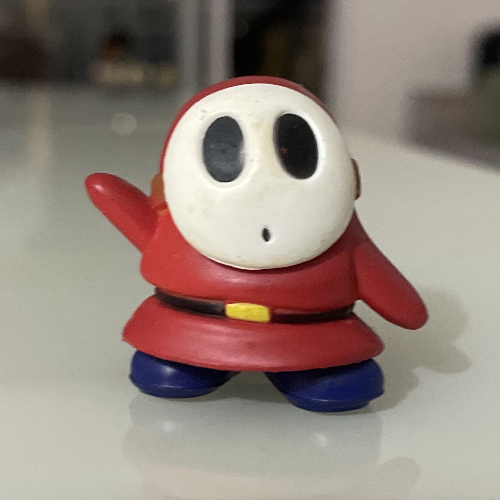

Height: 500
Width: 500
Pixel em (0, 0) - Red: 65, Green: 60, Blue: 54


In [24]:
image = cv2.imread('shy_guy.jpg')
image = cv2.resize(image, (500,500))

# Mostra a imagem na tela. 
cv2_imshow(image)

# Extrai a altura e a largura da imagem. Em geral, as imagens são mencionadas no
# formato (largura,altura), mas o OpenCV usa a representação (altura,largura). 
# Isso é muito importante de ser observado.
(h, w) = image.shape[:2]

# Mostra as dimensões da imagem
print(f'Height: {h}')
print(f'Width: {w}')

# As imagens são NumPy arrays. O canto superior da imagem está na posição (0, 0)
(b, g, r) = image[0, 0]
print("Pixel em (0, 0) - Red: {r}, Green: {g}, Blue: {b}".format(r=r, g=g, b=b))

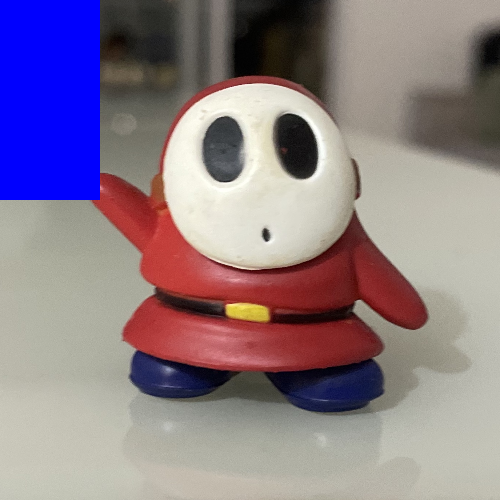

In [25]:
sample = image.copy()
sample[0:200,0:100] = (255,0,0)
cv2_imshow(sample)

## Translação

A translação consiste em deslocar a imagem dentro dos eixos *x* e *y*. Isso faz com que elas se movam para direita, esquerda, cima e baixo.

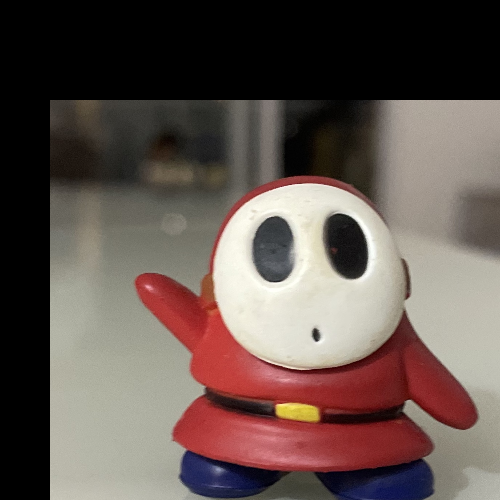

In [27]:
# NOTE: a transção consiste em uma matriz de operação na forma:
#	[[1, 0, shiftX], [0, 1, shiftY]]

# O OpenCV possui uma função para realizar a transformação com as operações sobre
# as matrizes da imagem e do operador de translação (e os demais operadores também).
# Basta especificar quantos pixels se quer deslocar na matriz apontada anteriormente.

# Vamos, por exemplo, transladar uma imagem 25 pixels para a direita e 50 pixels 
# para baixo.

#	Especificar no formato [[1, 0, shiftX], [0, 1, shiftY]]
M = np.float32([[1, 0, 50], [0, 1, 100]])

# Aplicar a função warpAffine passando a imagem, a transformação e a largura e altura
# da imagem.
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

cv2_imshow(shifted)

## Rotação

A rotação, como o próprio nome já informa, rotaciona a imagem em uma quantidade de graus definida. Vale salientar que a rotação é feita por padrão com base no centro da imagem.

O OpenCV, no entanto, permite que outros pontos sejam definidos como base para a rotação. Basta que sejam passados os pontos específicos como primeiro parâmetro da função (diferentes do centro da imagem).

Vamos começar, já definindo uma função para realizar a rotação para fins de facilitação na intepretação do código.

*__Nota__: a operação de rotação sempre é realizada no sentido anti-horário*

*__Nota 2__: a imagem deve ficar cortada quando a rotação é feita uma vez que o espaço alocado para ela (o canvas) não mudou. Então, caso seja desejado que a imagem seja completamente mostrada, o espaço deve ser realocado*

In [28]:
# Função que realiza a rotação em torno do centro da imagem.
def rotate(image,degree):

  # calcula o centro da imagem com base nas suas dimensões.
  (h, w) = image.shape[:2]
  (cX, cY) = (w / 2, h / 2)

  # rotaciona a imagem em degree graus.
  M = cv2.getRotationMatrix2D((cX, cY), degree, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h))

  # retorna a imagem rotacionada.
  return rotated

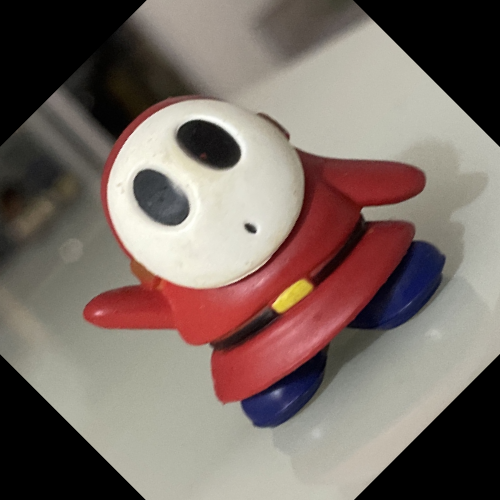

In [29]:
# rotate image by 45 degrees
rotated = rotate(image,45)
cv2_imshow(rotated)

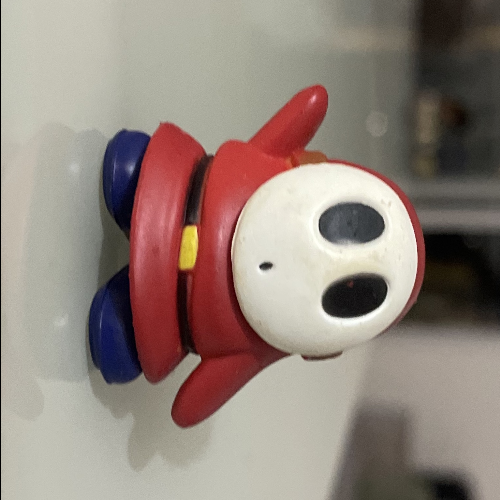

In [55]:
# rotate image by 45 degrees
rotated = rotate(image,-90)
cv2_imshow(rotated)

## Redimensionamento

O redimensionamento é muito útil uma vez que as imagens fornecidas para análise nem sempre são padronizadas. Em geral, precisamos redimensionar imagens para adequar as imagens a nossa arquitetura de projetos.

Uma observação importante ao realizar o redimensionamento é a relação largura x altura (o aspect ratio - AR). Com exceção de poucas situações, vamos querer sempre manter o AR ao redimensionar as imagens.

Um aspecto particular do redimensionamento é que ele envolve o conceito de interpolação. A interpolação é utilizada para preencher os novos espaços quando uma nova é imagem é gerada com tamanho diferente da original.

Quando reduzimos uma imagem, o processo é mais simples, já que basta remover alguns pixels (no geral). Mas, para aumentar o tamanho, novos pixels são acrescenteados e o valor deles depende é calculado com base nos vizinhos dos pixels da imagem original.

O OpenCV oferta uma gama de possíveis algoritmos de interpolação. Alguns são mais "realistas", mas consomem mais custo computacional; outros são mais simples, mas bastante eficientes em termo de tempo de execução. Por isso, eles devem ser utilizados com base na necessidade e restrições que sua aplicação tenha.

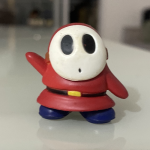

In [30]:
# Para manter o AR da imagem, devemos primeiro obter a relação largura x altura
# da imagem original. 

# Se quisermos deixar a imagem com uma nova largura de 150 pixels, devemos verificar 
# qual a relação entre 150 e a largura original da imagem.
r = 150.0 / image.shape[1]

# Após isso, a nova altura é calculada com base no valor obtido.
dim = (150, int(image.shape[0] * r))

# realizar o redimensionamento através do OpenCV. 
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

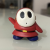

In [31]:
# Se quisermos fazer o ajuste da altura da imagem utilizamos o mesmo conceito, mas 
# devemos manter o AR e calculá-lo utilizando como base a altura.

# Vamos redimensioanr a imagem para ter 50 pixels de altura.
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

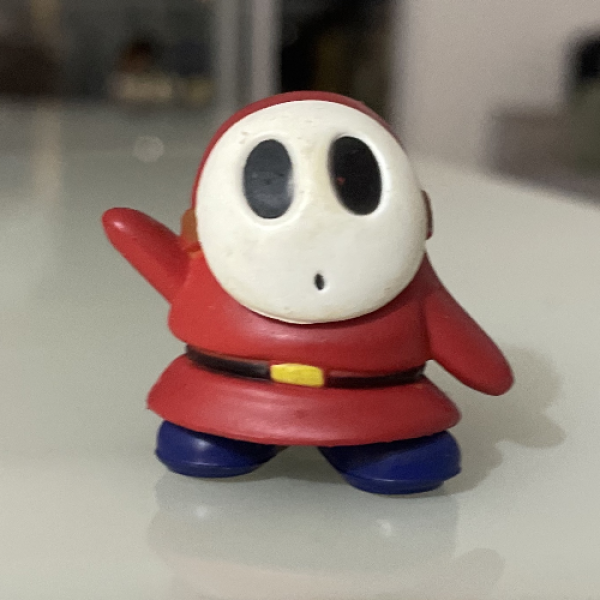

In [57]:
# Agora para um tamanho maior

# Vamos redimensioanr a imagem para ter 1080 pixels de altura.
r = 600.0 / image.shape[0]
dim = (int(image.shape[1] * r), 600)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

# Espelhamento

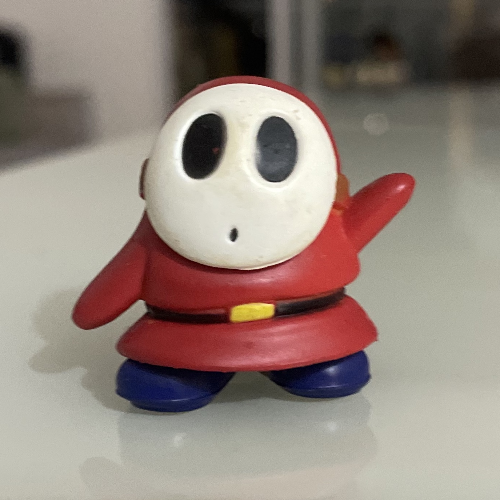

In [33]:
flipHorizontal = cv2.flip(image, 1)
cv2_imshow(flipHorizontal)

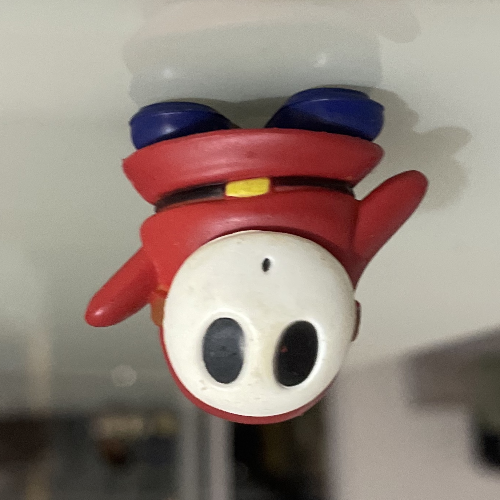

In [34]:
flipVertical = cv2.flip(image, 0)
cv2_imshow(flipVertical)

# Crop

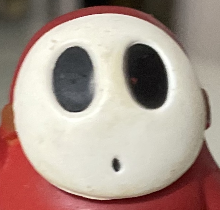

In [40]:
crop = image[70:280,150:370]
cv2_imshow(crop)

# Masking

In [43]:
image.shape

(500, 500, 3)

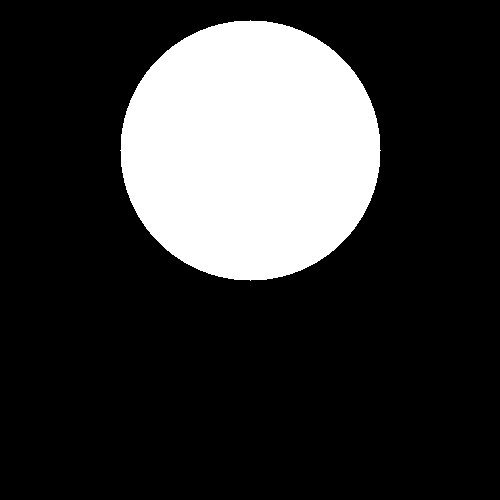

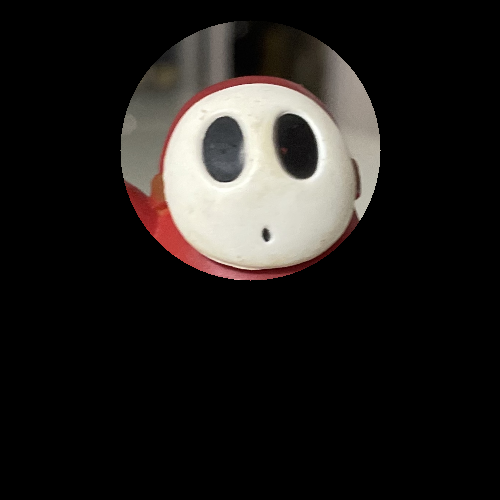

In [49]:
mask = np.zeros(image.shape[:2], dtype="uint8")

cv2.circle(mask, (250, 150), 130, 255, -1)

masked = cv2.bitwise_and(image, image, mask=mask)
# show the output images
cv2_imshow(mask)
cv2_imshow(masked)

## mascaramento

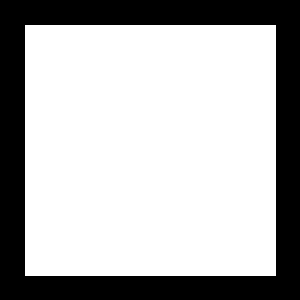

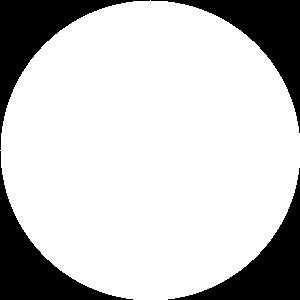

In [60]:
# draw a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2_imshow(rectangle)
# draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2_imshow(circle)

## and

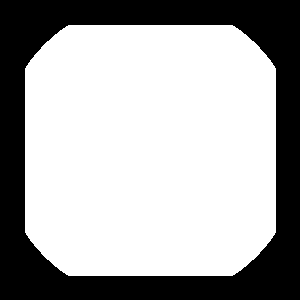

In [61]:
# a bitwise 'AND' is only 'True' when both inputs have a value that
# is 'ON' -- in this case, the cv2.bitwise_and function examines
# every pixel in the rectangle and circle; if *BOTH* pixels have a
# value greater than zero then the pixel is turned 'ON' (i.e., 255)
# in the output image; otherwise, the output value is set to
# 'OFF' (i.e., 0)
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2_imshow(bitwiseAnd)

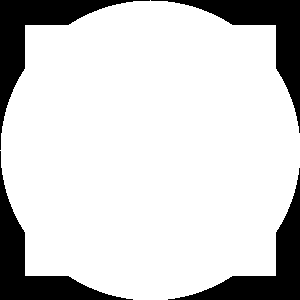

In [62]:
# a bitwise 'OR' examines every pixel in the two inputs, and if
# *EITHER* pixel in the rectangle or circle is greater than 0,
# then the output pixel has a value of 255, otherwise it is 0
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2_imshow(bitwiseOr)

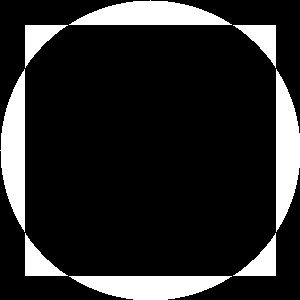

In [63]:
# the bitwise 'XOR' is identical to the 'OR' function, with one
# exception: the rectangle and circle are not allowed to *BOTH*
# have values greater than 0 (only one can be 0)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2_imshow(bitwiseXor)

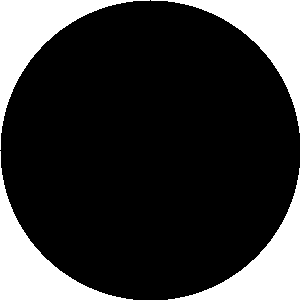

In [64]:
# finally, the bitwise 'NOT' inverts the values of the pixels;
# pixels with a value of 255 become 0, and pixels with a value of 0
# become 255
bitwiseNot = cv2.bitwise_not(circle)
cv2_imshow(bitwiseNot)

# Separação dos canais

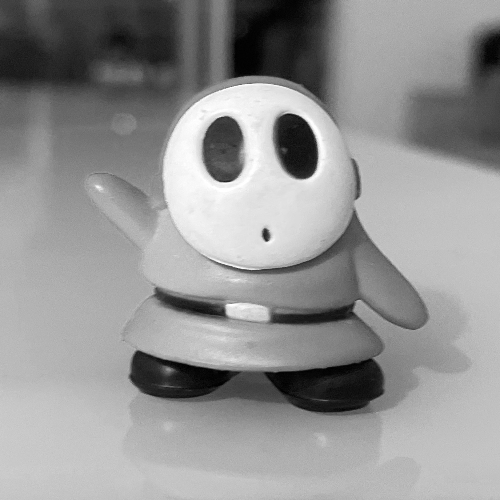

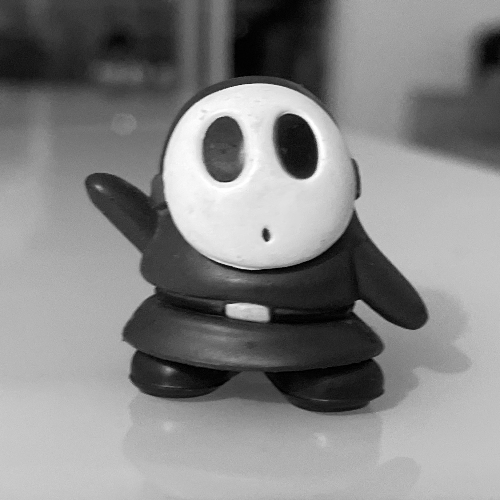

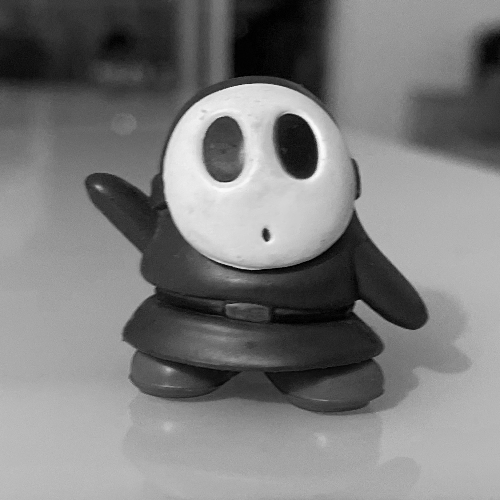

In [52]:
(B, G, R) = cv2.split(image)
cv2_imshow(R)
cv2_imshow(G)
cv2_imshow(B)